# **PREVENDO RESULTADO DE UMA COLHEITA**

## **Problema de Negócio**

Nosso objetivo neste projeto é criar um modelo para prever o resultado da temporada de colheita, danto total atenção a 3 pontos, que são:

 **1. Saudável (viva)**

 **2. Danificada por pesticidas** ou 
 
 **3. Danificada por outros motivos.**

 * nosso TARGET é **multiclasses**, avaliando se é saudável ou não(*danificada por pesticidas ou por outros motivos*)

Nossa base de dados é baseada em safras colhidas por outros agricultores no final da temporada de colheita. 

--

-

Utilizaremos o conceito de **agricultura inteligente** que torna a agricultura mais eficiente e eficaz com a ajuda de algoritmos de alta precisão.

O **Machine Learning** ajuda na quantificação e compreensão dos processos intensivos de dados em ambientes operacionais agrícolas, estando presente em todo o ciclo de cultivo e colheita:

- começa com o plantio de uma semente no solo
- preparo do solo, procriação de sementes e medição da alimentação de água
- termina quando as redes neurais fazem a colheita determinando a maturação com a ajuda da visão computacional.


---

## **O que é possível fazer como Ciencia de Dados**

- Previsão de Demanda dos Produtos e de Insumos para produção
- Otimização da Cadeia de Suprimentos
- Detecção e Prevenção de Pragas
- Otimização da lavoura
- Inspeção Visual
- Máquinas Autônomas
- Gerenciamento de Água
- Previsão da Qualidade da Colheita
- Detecção de Ervas Daninhas

---

## **Variáveis identificadas:**

1. **ID - UniqueID** - identifica a lavoura
2.**Estimated_Insects_Count** - Contagem estimada de insetos por metro quadrado
3. **Crop_Type** - Categoria de cultivo (0,1)
4. **Tipo_do solo** - Categoria do solo (0,1)
5. **Pesticide_Use_Category** - Tipo de uso de pesticidas (1- 6. Nunca, 2-Usado anteriormente, 3-Usando atualmente)
7. **Number_Doses_Week** - Número de doses por semana
8. **Number_Weeks_Used** - Número de semanas usadas
9. **Number_Weeks_Quit** - Número de semanas de desistência
10. **Temporada** - Categoria Temporada (1,2,3)
11. **Crop_Damage** - Categoria de dano de cultivo (0 = vivo, 1 = dano devido a outras causas, 2 = dano devido a pesticidas)

---

# **ANÁLISE EXPLORATÓRIA**

In [1]:
# Instalação do catboost
!pip3 install catboost

     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [2]:
# Importação de pacotes
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore")

**Improtando base de dados**

In [3]:
# Base de dados
dataset = pd.read_csv('treino.csv')

In [4]:
dataset.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


In [5]:
dataset.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [6]:
dataset.shape

(88858, 10)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


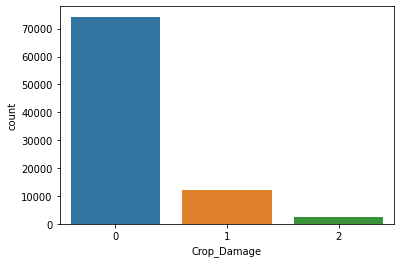

In [8]:
# Analisando o TARGET ('Crop_Damage')
dataset['Crop_Damage'].value_counts()
graphic = sns.countplot(x = dataset['Crop_Damage'])

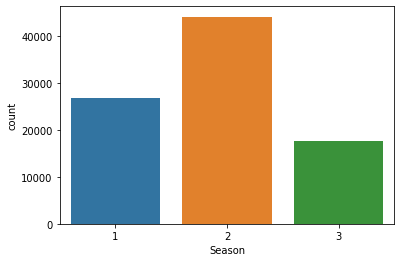

In [9]:
# Analisando Season
dataset['Season'].value_counts()
graphic = sns.countplot(x = dataset['Season'])

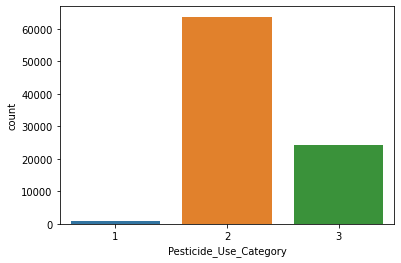

In [10]:
# Analisando a categoria de pesticida
dataset['Pesticide_Use_Category'].value_counts()
graphic = sns.countplot(x = dataset['Pesticide_Use_Category'])

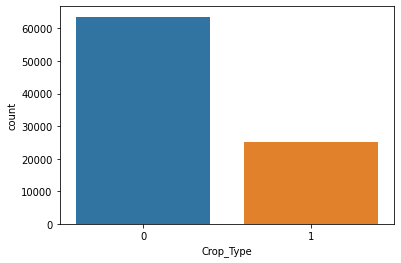

In [11]:
# Analisando a categoria de cultivo
dataset['Crop_Type'].value_counts()
graphic = sns.countplot(x = dataset['Crop_Type'])

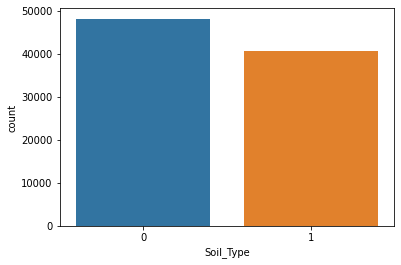

In [12]:
# Analisando o tipo de solo
dataset['Soil_Type'].value_counts()
graphic = sns.countplot(x = dataset['Soil_Type'])

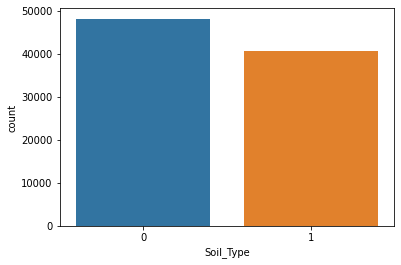

In [13]:
# Analisando o tipo de solo
dataset['Soil_Type'].value_counts()
graphic = sns.countplot(x = dataset['Soil_Type'])

In [14]:
# Verificando presença de dados nulos
dataset.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [15]:
# Verificando presença de dados duplicados
dataset.duplicated().sum()

0

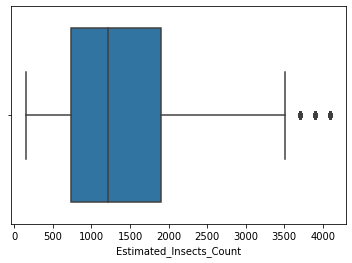

In [16]:
# Contando a quantidade de insetos
dataset['Estimated_Insects_Count'].describe()
var = sns.boxplot(x = dataset['Estimated_Insects_Count'])
# Identificamos uma grande quantidade de insetos (outliers)

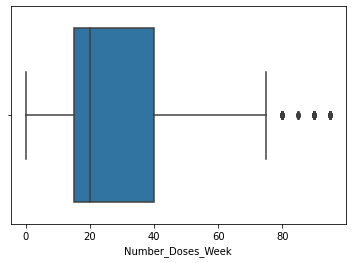

In [17]:
# Examinando a quantidade de doses na semana
dataset['Number_Doses_Week'].describe()
var = sns.boxplot(x = dataset['Number_Doses_Week'])

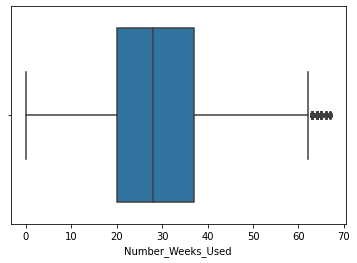

In [18]:
# Para sincronizar com a análise acima, este gráfico explora o número de semanas de uso de pesticidas
dataset['Number_Weeks_Used'].describe()
var = sns.boxplot(x = dataset['Number_Weeks_Used'])

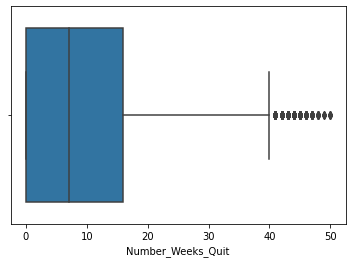

In [19]:
# Aqui refere-se ao número de semanas em que não foram usados pesticidas
dataset['Number_Weeks_Quit'].describe()
var = sns.boxplot(x = dataset['Number_Weeks_Quit'])

# **PRÉ-PROCESSAMENTO DOS DADOS**

In [20]:
# Eliminamos a variável "ID" pois não tem muita utilidade para a análise
dataset.drop('ID', axis = 1, inplace = True)
dataset.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [21]:
# Tratamento dos valores ausentes
dataset.dropna(inplace = True)

In [ ]:
dataset.head()

In [23]:
# Usamos a técnica One-Hot Encoder que é a separação dos dados em variáveis numéricas binárias
for col in ['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season']: # criando uma lista de variáveis
  dataset = pd.get_dummies(dataset, columns = [col]) # get_dummies = transformando variáveis de acordo com o tipo de domínio


In [ ]:
dataset.shape

In [ ]:
dataset.head(2)

In [28]:
# Separando o TARGET(Y) das variáveis explicativas(X)
x = dataset.drop(['Crop_Damage'], axis = 1)
y = dataset['Crop_Damage'].values.reshape(-1, 1)

In [29]:
# Amostragem com os dados de treino e de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

**Máquina Preditiva**

In [31]:
# Treinando a máquina preditiva
# n_estimators = número de árvores usadas
# max_depth = profundidade máxima (deixamos nesse patamar para evitar overfiting "viciar")
maq_pred = CatBoostClassifier(n_estimators = 1000, max_depth = 4, random_state = 7)

In [ ]:
# Treino
maq_pred.fit(x_train, y_train)

In [33]:
# Predições com o x_test
predicoes = maq_pred.predict_proba(x_test)

**Avaliação das Máquinas Preditivas**

In [34]:
# Usando o Score
result = maq_pred.score(x_test, y_test)
print('Acurácia nos Dados de Teste: %.3f%%' % (result * 100)) # transformando em porcentagem

Acurácia nos Dados de Teste: 80.103%


In [ ]:
# Determinando as variáveis mais importantes
maq_pred.feature_importances_

In [ ]:
dataset.info()

Autor: Jonatas Anderson Liberato
Créditos: Eduardo Rocha